In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Exercise 1

## Q1
Load the file Im1.jpg in Im1. Display the image and describe the problem with
this image.

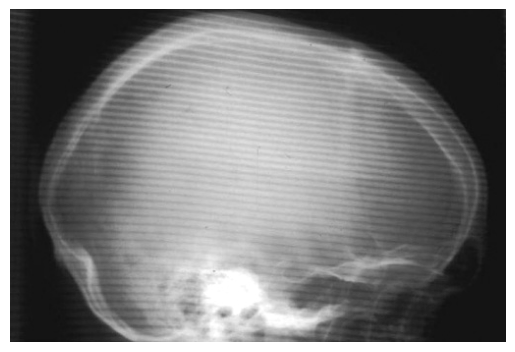

In [2]:
img = cv2.imread('Im1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [3]:
print(f"the shape of the image is: {img.shape}")
print(f"the range of the image is: {img.min()} to {img.max()}")
print("the type of the image is: ", img.dtype)


the shape of the image is: (339, 505)
the range of the image is: 16 to 255
the type of the image is:  uint8


In [4]:
img = img/255
print(f"the range of the image is: {img.min()} to {img.max()}")
print("the type of the image is: ", img.dtype)

the range of the image is: 0.06274509803921569 to 1.0
the type of the image is:  float64


Problems with the image:
- we can see the image has some horizontal noise. 
- there is shallow white area in the left side of the image.
- we can see the dark pixels in the image are not zero.

# Q2
Use a mean filter of size 3×3 and 5×5 to denoise. Display and comment the results.

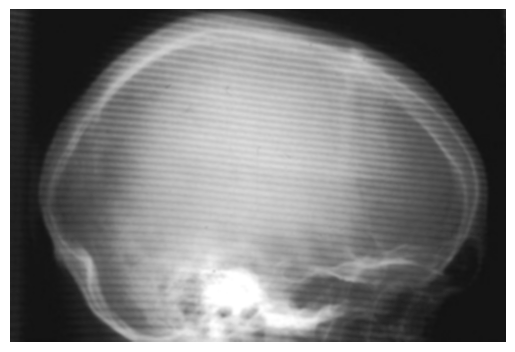

In [5]:
img_mean_3 = cv2.blur(img,(3,3))
plt.imshow(img_mean_3, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()

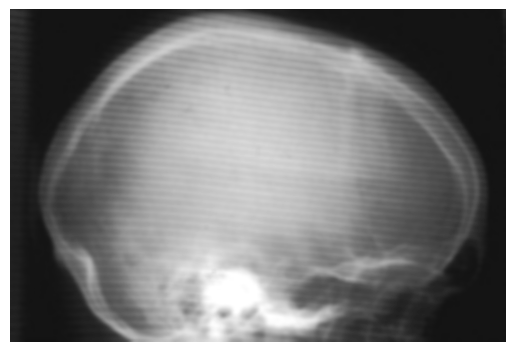

In [6]:
img_mean_5 = cv2.blur(img,(5,5))
plt.imshow(img_mean_5, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()


we can see the lines are disappeared a bit.
obviously, in 3x3 filter, the lines are more clear than 5x5 filter.

# Q3
Compute and display the amplitude of the Fourier Transform of Im1.


the shape of the image is:  (339, 505)


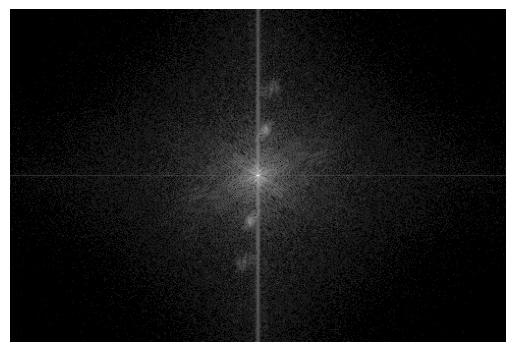

In [7]:
img_fft_raw = np.fft.fft2(img)
img_fft = np.fft.fftshift(img_fft_raw)
img_fft_amp = np.log1p(np.abs(img_fft))
print("the shape of the image is: ", img_fft_amp.shape)
plt.imshow(img_fft_amp.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()

# Q4
Detect in the amplitude of the spectrum the noise patterns which might be due to
the Moiré effect. Write the commands to detect/display these zones of the matrix.
(Inspect the position by hand in the matrix/image, then check in the matrix of the
amplitude, there should be be 4 “anomalies”).

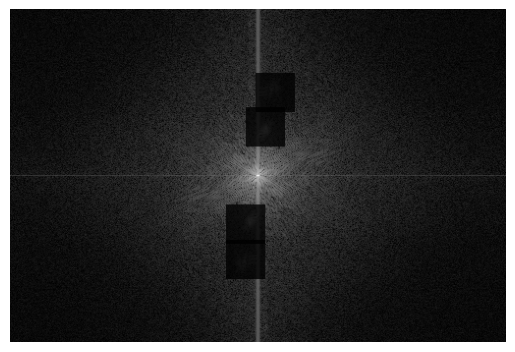

In [8]:
rec_locs = [(120, 260), (85, 270), (219, 240), (255, 240)]
rec_daimeter = [20, 20, 20, 20]

img_fft_raw = np.fft.fft2(img)
img_fft = np.fft.fftshift(img_fft_raw)
img_fft_amp = np.log1p(np.abs(img_fft))
for (x,y), d in zip(rec_locs, rec_daimeter):
    img_fft_amp[x-d:x+d, y-d:y+d] *= 0.2

plt.imshow(img_fft_amp, cmap='gray')
plt.axis('off')
plt.show()

# Q5
Propose a filter $h$, which will be defined in the frequency domain and which should
allow to discard the problematic frequencies. Construct $\mathcal{F}(h)$ and display $|\mathcal{F}(h)|$.

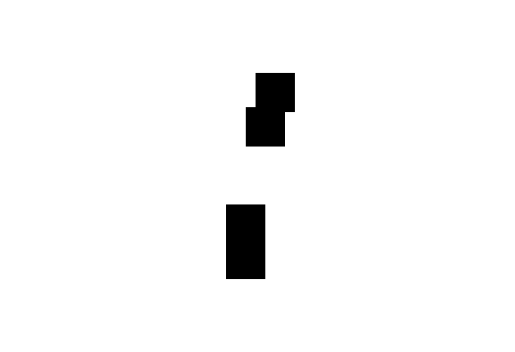

In [9]:
h = np.ones_like(img)
for (x,y), d in zip(rec_locs, rec_daimeter):
    h[x-d:x+d, y-d:y+d] = 0

plt.imshow(h, cmap='gray')
plt.axis('off')
plt.show()

## 3D view of the filter


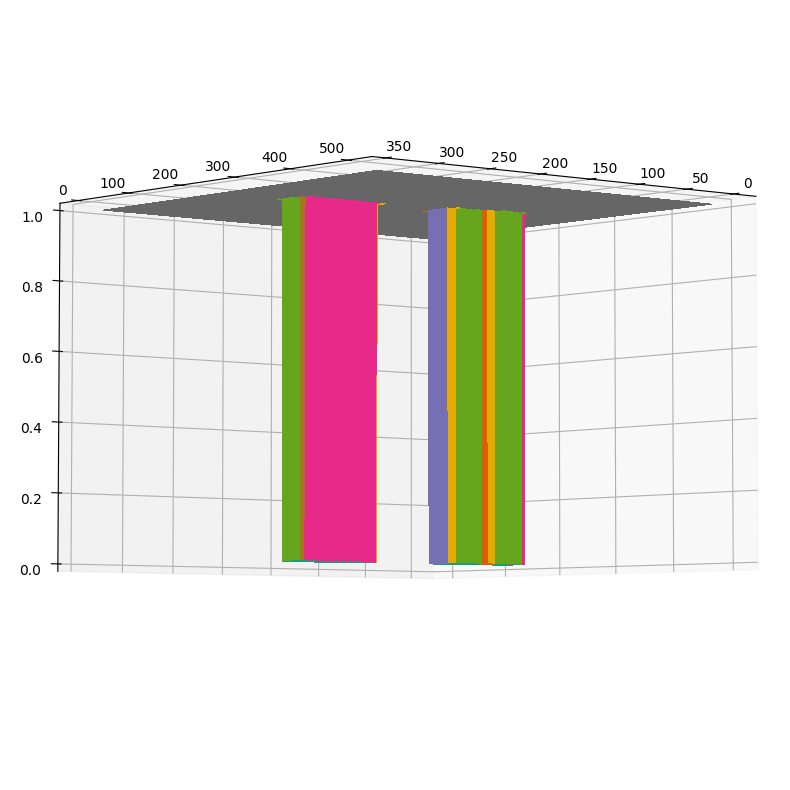

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(np.arange(h.shape[0]), np.arange(h.shape[1]))

surf = ax.plot_surface(X, Y, h.T, cmap="Dark2",
                       linewidth=0, antialiased=False)

ax.view_init(-4, 50)
plt.show()

# 6
Compute F(h ∗ Im1) and display jF(h ∗ Im1)j.

we know:
$$
\mathcal{F}(h \ast Im1) = \mathcal{F}(h) \cdot \mathcal{F}(Im1)
$$

in my codes, $\mathcal{F}(h)$ is defined as $h$.

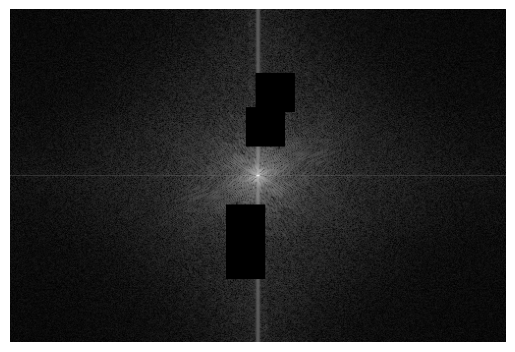

In [11]:
filtered = img_fft * h
filtered_amp = np.log1p(np.abs(filtered))
plt.imshow(filtered_amp, cmap='gray')
plt.axis('off')
plt.show()

# 7
Compute and display h ∗ Im1.


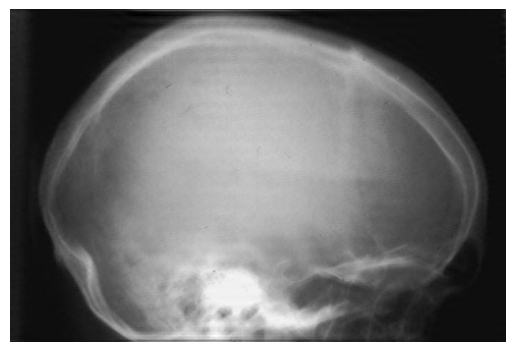

In [12]:
filtered_img = np.fft.ifft2(np.fft.ifftshift(filtered))
filtered_img = np.abs(filtered_img)
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')
plt.show()

> - TODO: study the impact of the rectangle size on the result.
> - TODO: check what will happen if we use circle instead of rectangle.


# Exercise 2

## Q1

Load the file signal_hw.bin in f. Display the signal f. What is its length N?

to do so i have used the following code in octave:

```octave
load -binary  signal_hw.bin f
csvwrite('signal_hw.txt', f)
```

In [13]:
with open("signal_hw.txt") as f:
    data = np.array(f.read().strip().split(",")).astype(np.float32)
    # since the data only contains only one row, there is no need to read line by line
data.shape

(800,)

as we can see the size of the signal is 800.

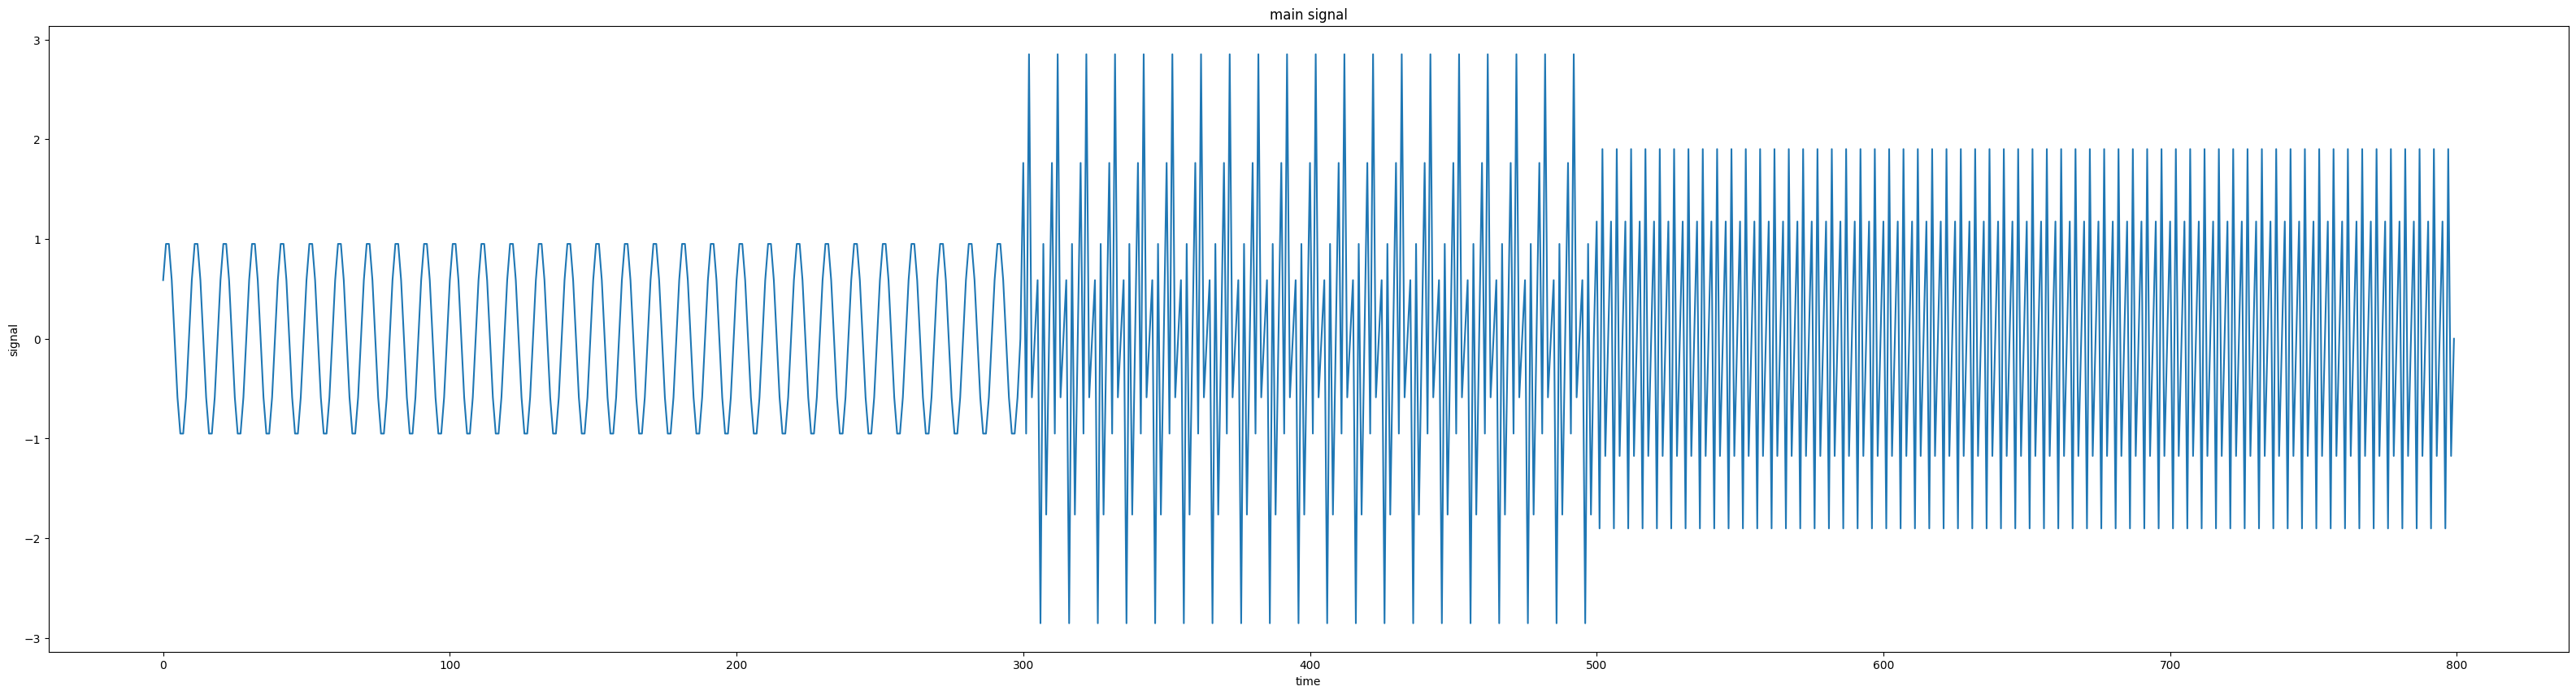

In [14]:
plt.figure(figsize=(40, 10))
plt.plot(data)
plt.xlabel("time")
plt.ylabel("signal")
plt.title("main signal")
plt.show()

## Q2
Compute the fft of f by *zero-padding* to obtain a signal of length $2^{10}$. Display the
amplitude and phase in the usual way.

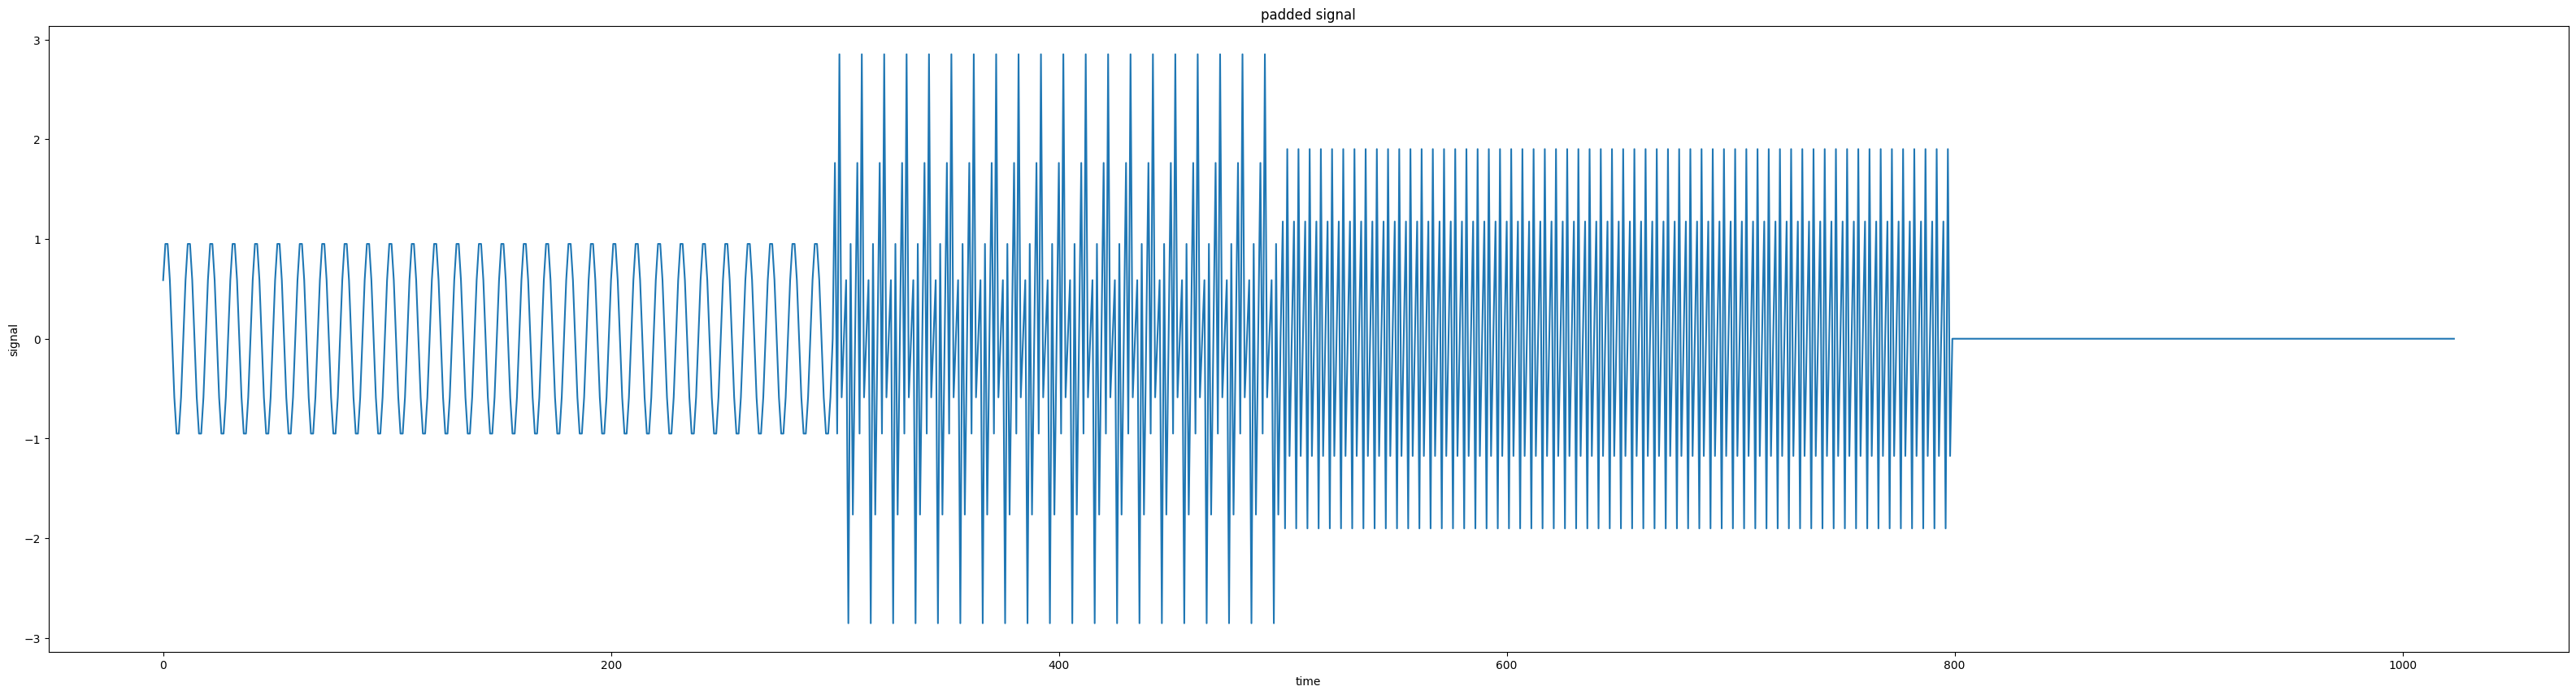

In [15]:
padded_data = np.pad(data, (0, 1024 - data.shape[0]), mode='constant', constant_values=0)
# zero_count = 1024 - data.shape[0]
# padded_data = np.concatenate([zero_count//2 * [0], data, zero_count//2 * [0]])
plt.figure(figsize=(40, 10))
plt.plot(padded_data)
plt.xlabel("time")
plt.ylabel("signal")
plt.title("padded signal")
plt.show()

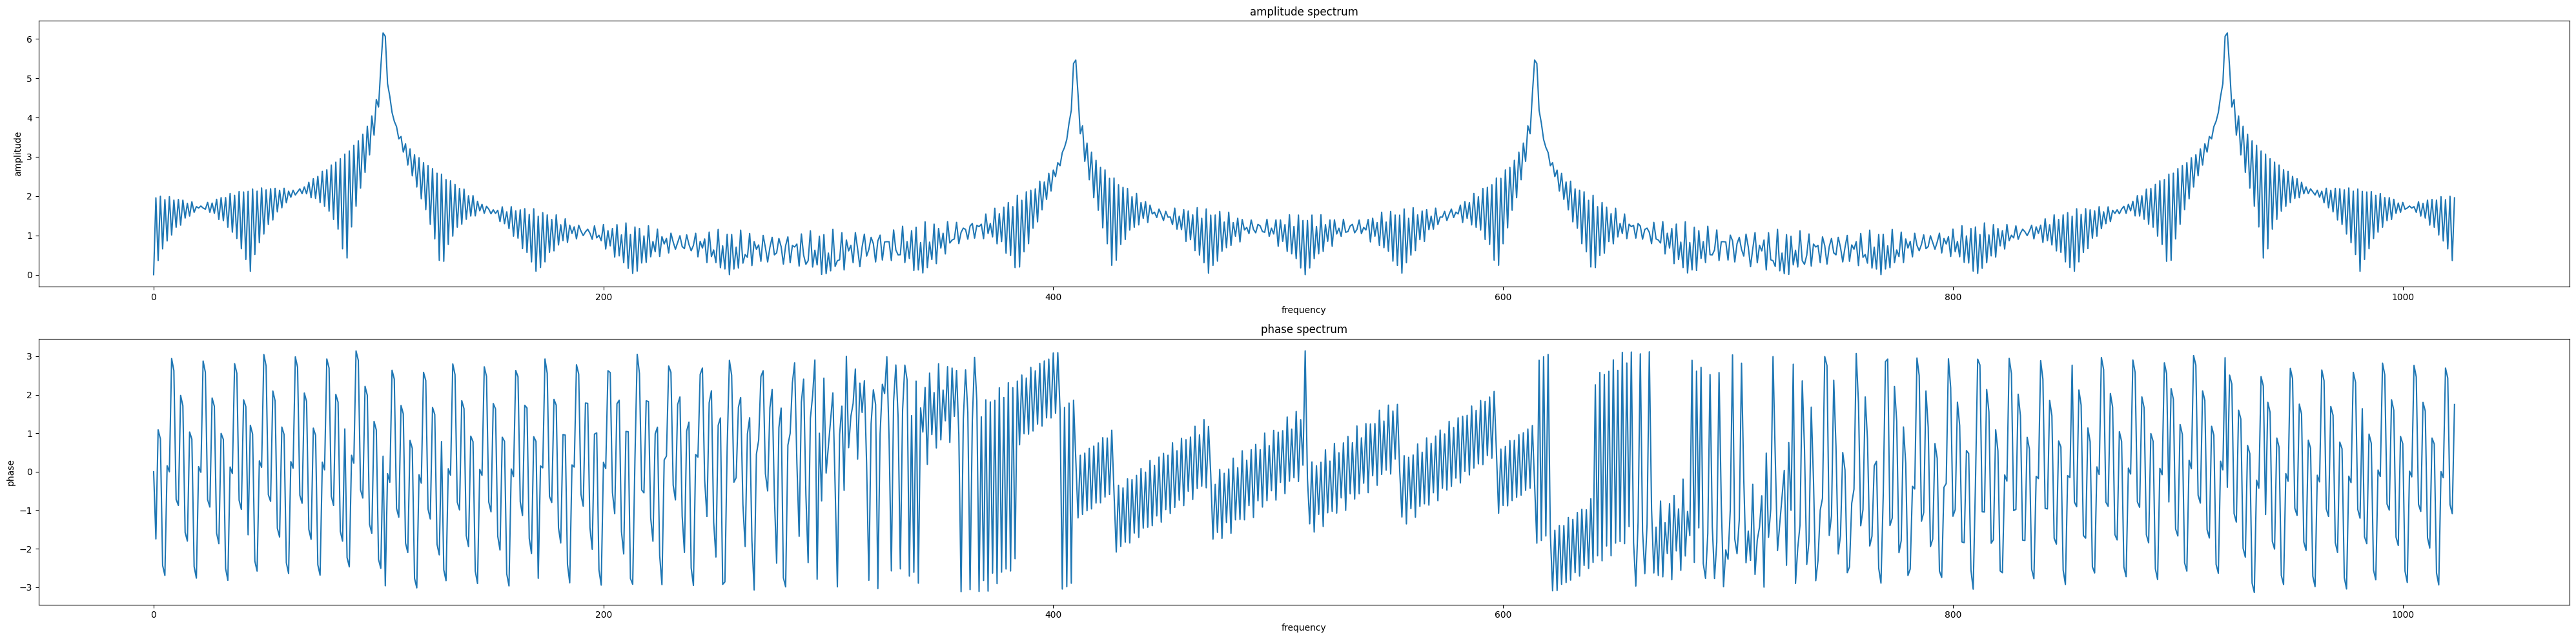

In [16]:
data_fft =  np.fft.fft(padded_data)
data_fft = np.fft.fftshift(data_fft)
data_fft_amp = np.log1p(np.abs(data_fft))
data_fft_phase = np.angle(data_fft)

plt.figure(figsize=(40, 10))
plt.subplot(211)
plt.plot(data_fft_amp)
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.title("amplitude spectrum")
plt.subplot(212)
plt.plot(data_fft_phase)
plt.xlabel("frequency")
plt.ylabel("phase")
plt.title("phase spectrum")
plt.tight_layout()
plt.show()

## Q3
Create a new signal `fr` by time inversion. Display the signal `fr` and repeat question 2 for `fr`.


since the indexes in any programming language cannot be negative, we can simply invert the signal by reversing the signal.

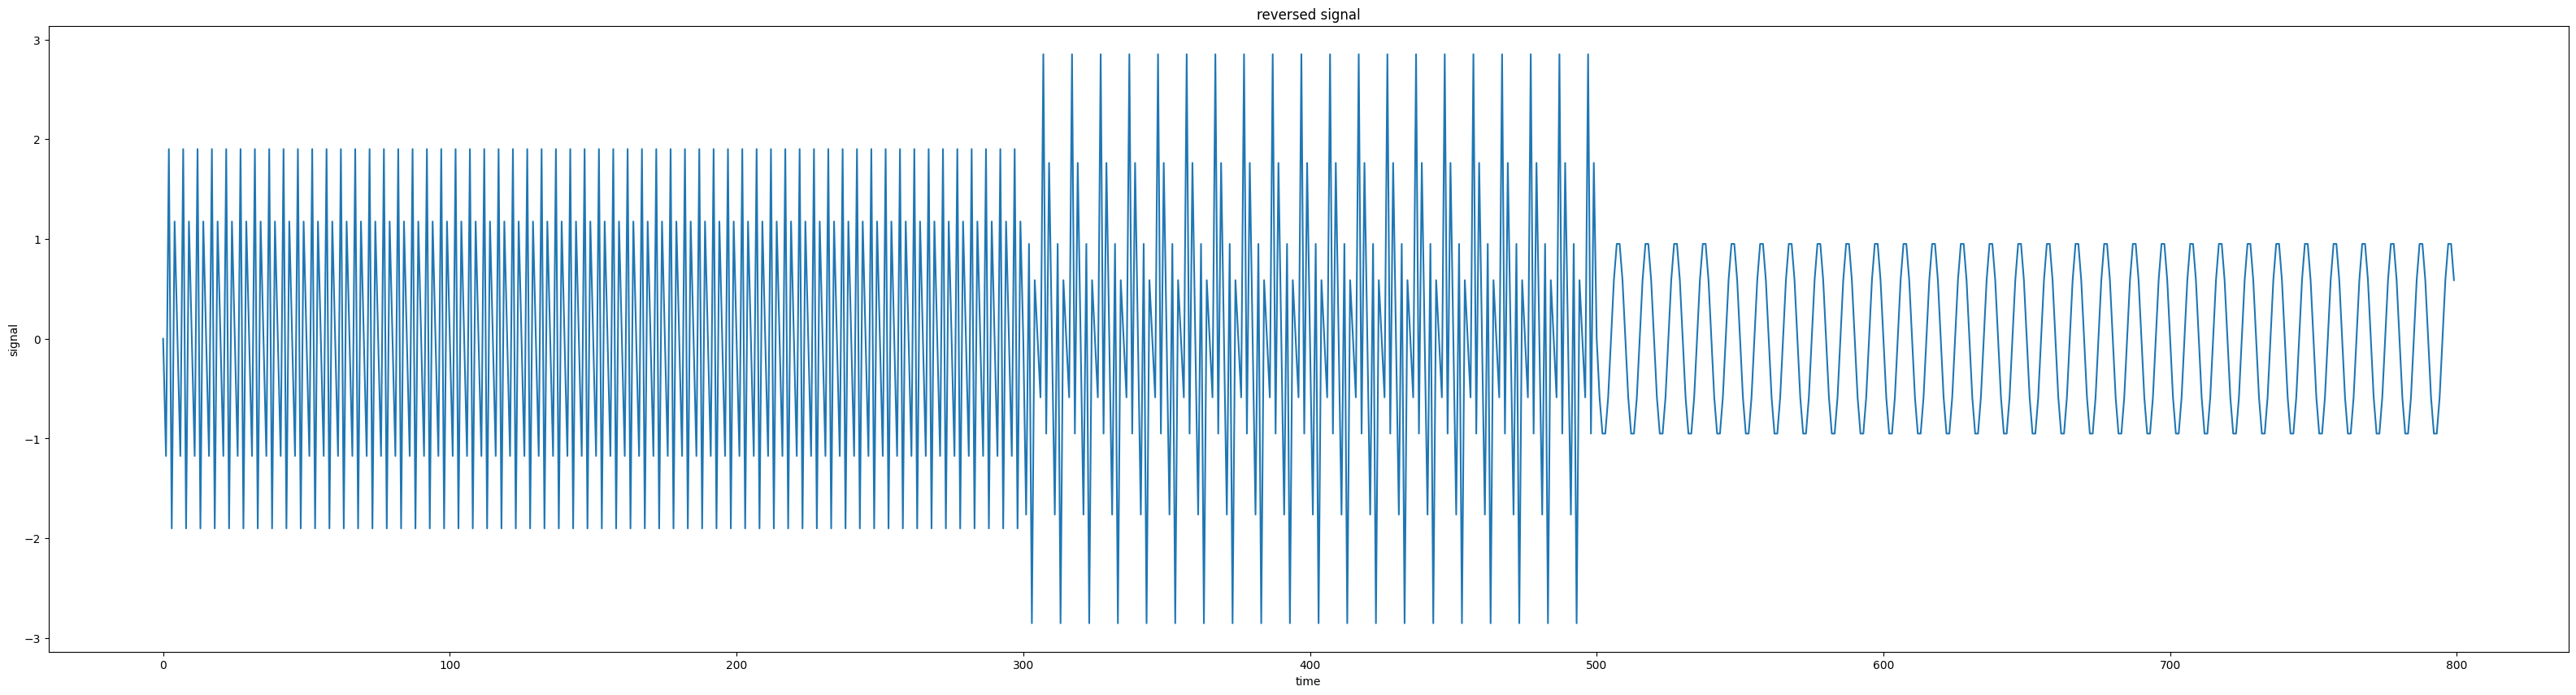

In [17]:
fr = data[::-1]
plt.figure(figsize=(40, 10))
plt.plot(fr)
plt.xlabel("time")
plt.ylabel("signal")
plt.title("reversed signal")
plt.show()

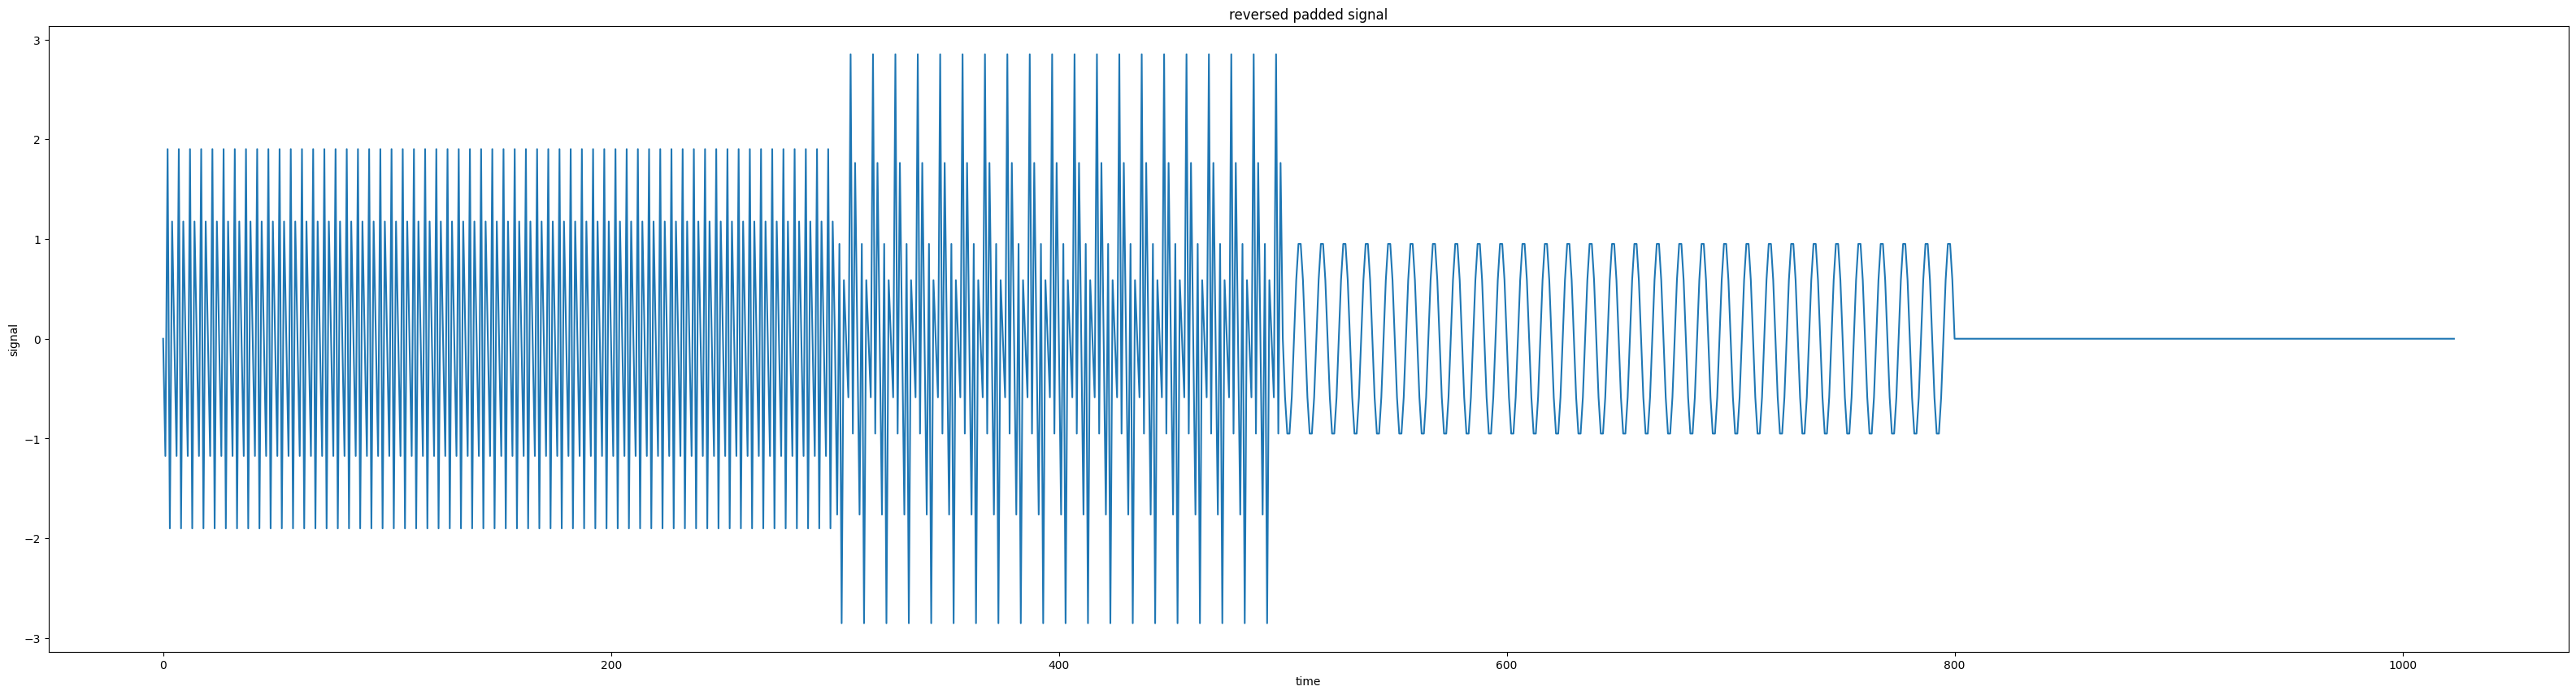

In [18]:
fr_padded = np.pad(fr, (0, 1024 - fr.shape[0]), mode='constant', constant_values=0)
# zero_count = 1024 - fr.shape[0]
# fr_padded = np.concatenate([zero_count//2 * [0], fr, zero_count//2 * [0]])
# fr_padded = fr.copy()
plt.figure(figsize=(40, 10))
plt.plot(fr_padded)
plt.xlabel("time")
plt.ylabel("signal")
plt.title("reversed padded signal")
plt.show()


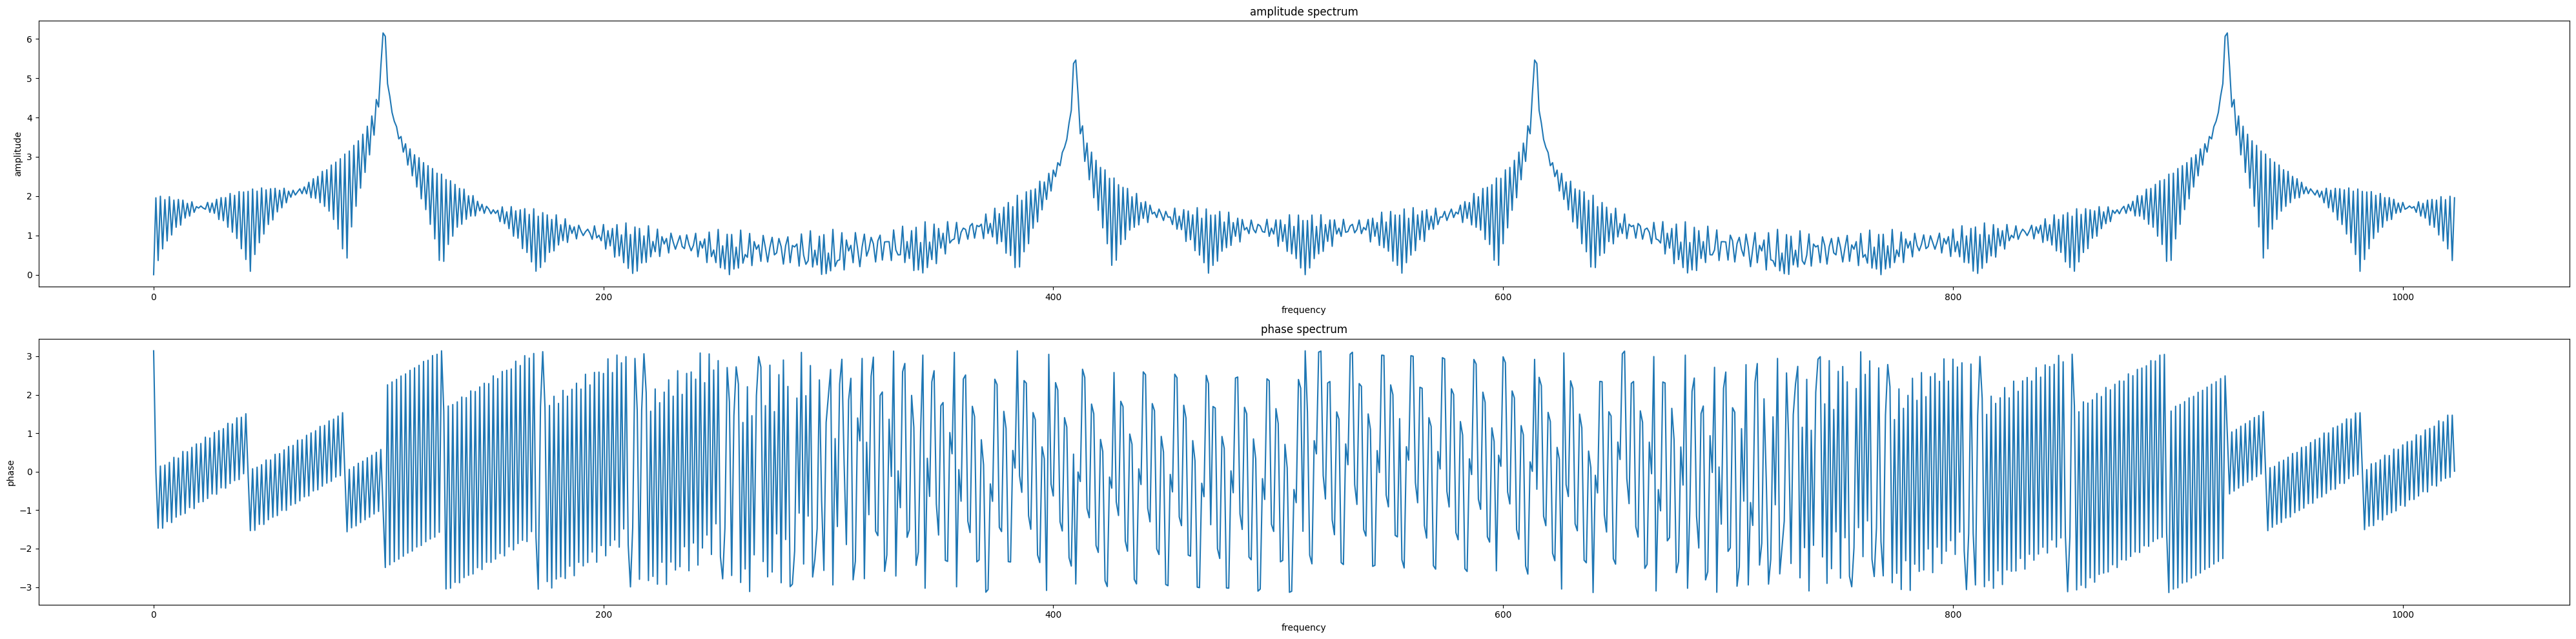

In [19]:
fr_fft = np.fft.fft(fr_padded)
fr_fft = np.fft.fftshift(fr_fft)
fr_fft_amp = np.log1p(np.abs(fr_fft))
fr_fft_phase = np.angle(fr_fft)
plt.figure(figsize=(40, 10))
plt.subplot(211)
plt.plot(fr_fft_amp)
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.title("amplitude spectrum")
plt.subplot(212)
plt.plot(fr_fft_phase)
plt.xlabel("frequency")
plt.ylabel("phase")
plt.title("phase spectrum")
plt.tight_layout()
plt.show()


to compare two recent results, lets draw amplitude and phase of the two signals in one plot.

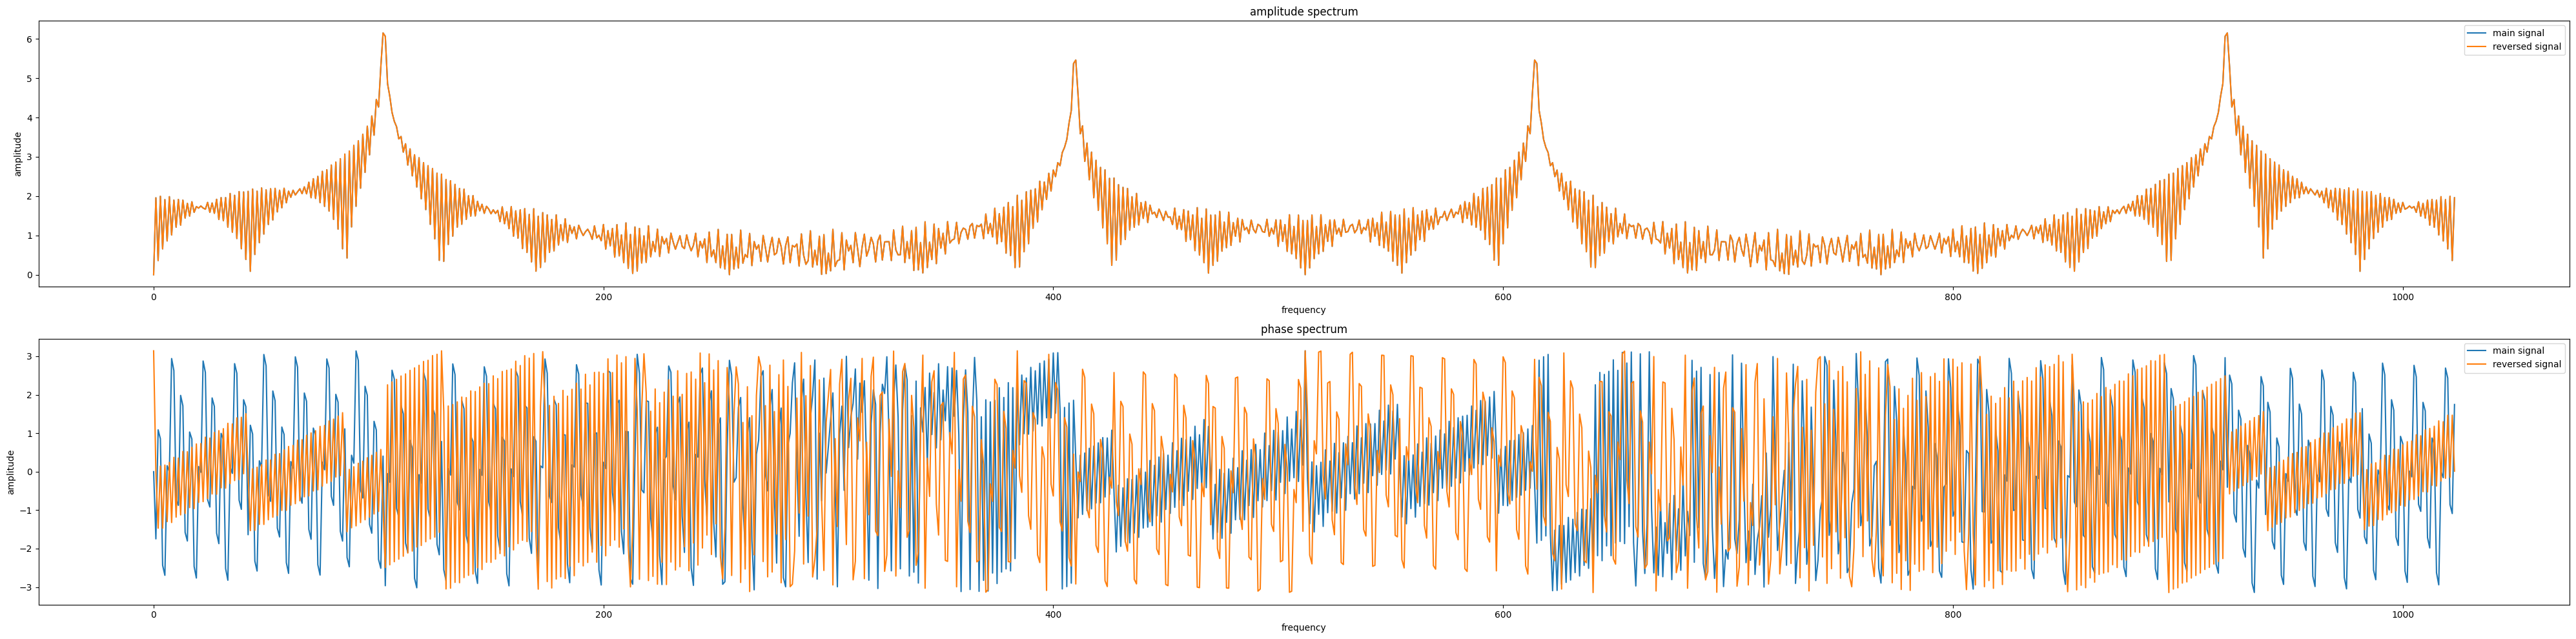

distance between amplitutes: 7.427801365385628e-27
distance between phases: 6660.927622818686


In [20]:
plt.figure(figsize=(40, 10))
plt.subplot(211)
plt.plot(data_fft_amp, label = "main signal")
plt.plot(fr_fft_amp, label = "reversed signal")
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.title("amplitude spectrum")
plt.legend()
plt.subplot(212)
plt.plot(data_fft_phase, label = "main signal")
plt.plot(fr_fft_phase, label = "reversed signal")
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.title("phase spectrum")
plt.legend()
plt.tight_layout()
plt.show()
# also, for better comparison we can compute the distance between two signals
print("distance between amplitutes:", np.sum((data_fft_amp - fr_fft_amp)**2))
print("distance between phases:", np.sum((data_fft_phase - fr_fft_phase)**2))

lets try shifting the signal:

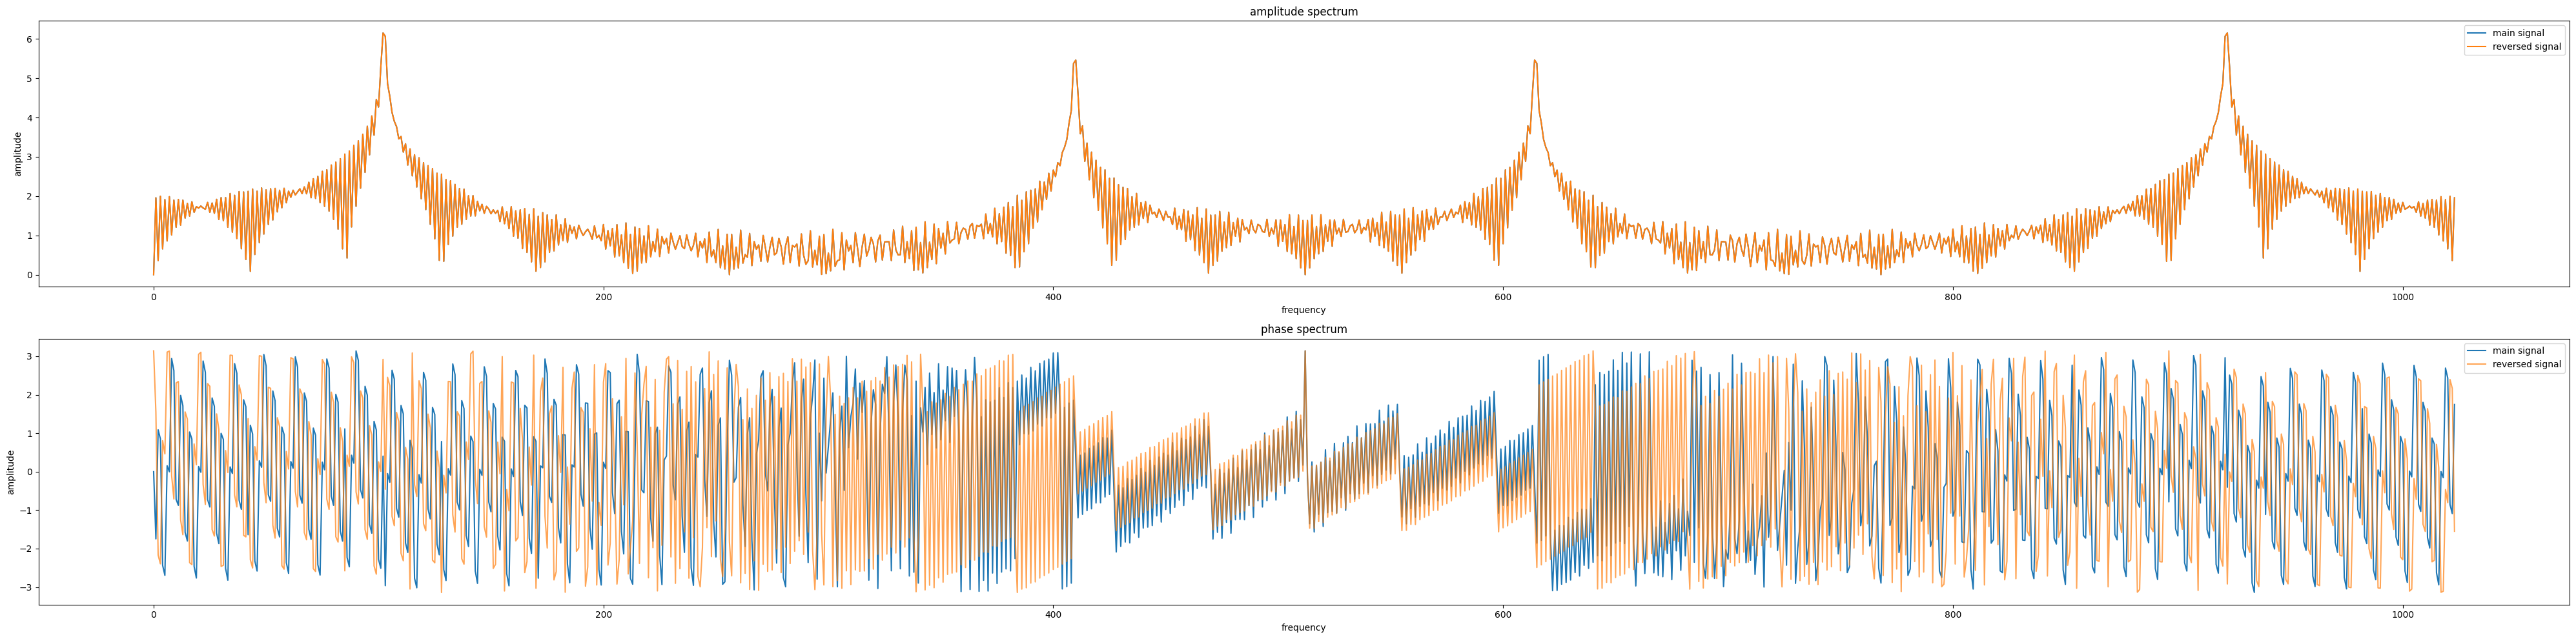

distance between amplitutes: 7.427801365385628e-27
distance between phases: 7652.991041745818


In [21]:
# fr_fft_phase_shifted = np.roll(np.angle(fr_fft * np.exp(-1j * 2 * np.pi * 800 / 1024 * np.linspace(-np.pi, np.pi,1024) ** 0)), 512)
# fr_fft_phase_shifted = -np.roll(np.angle(np.conjugate(fr_fft)), 512)
# fr_fft_phase_shifted =  (2 * np.pi / 1024) * np.arange(1024) + fr_fft_phase_shifted

# fr_fft_phase_shifted = -np.roll(fr_fft_phase, len(fr_fft_phase)//2) + 2 * np.pi * 800 / 1024 
fr_fft_phase_shifted = np.roll(fr_fft_phase, len(fr_fft_phase)//2) 
plt.figure(figsize=(40, 10))
plt.subplot(211)
plt.plot(data_fft_amp, label = "main signal")
plt.plot(fr_fft_amp, label = "reversed signal")
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.title("amplitude spectrum")
plt.legend()
plt.subplot(212)
plt.plot(data_fft_phase, label = "main signal")
plt.plot(fr_fft_phase_shifted, label = "reversed signal", alpha = 0.7)
# plt.xlim(0, 512)
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.title("phase spectrum")
plt.legend()
plt.tight_layout()
plt.show()
# also, for better comparison we can compute the distance between two signals
print("distance between amplitutes:", np.sum((data_fft_amp - fr_fft_amp)**2))
print("distance between phases:", np.sum((data_fft_phase - fr_fft_phase_shifted)**2))

# Q5

Use stft to compute the WFT for common windows sizes of f and fr.


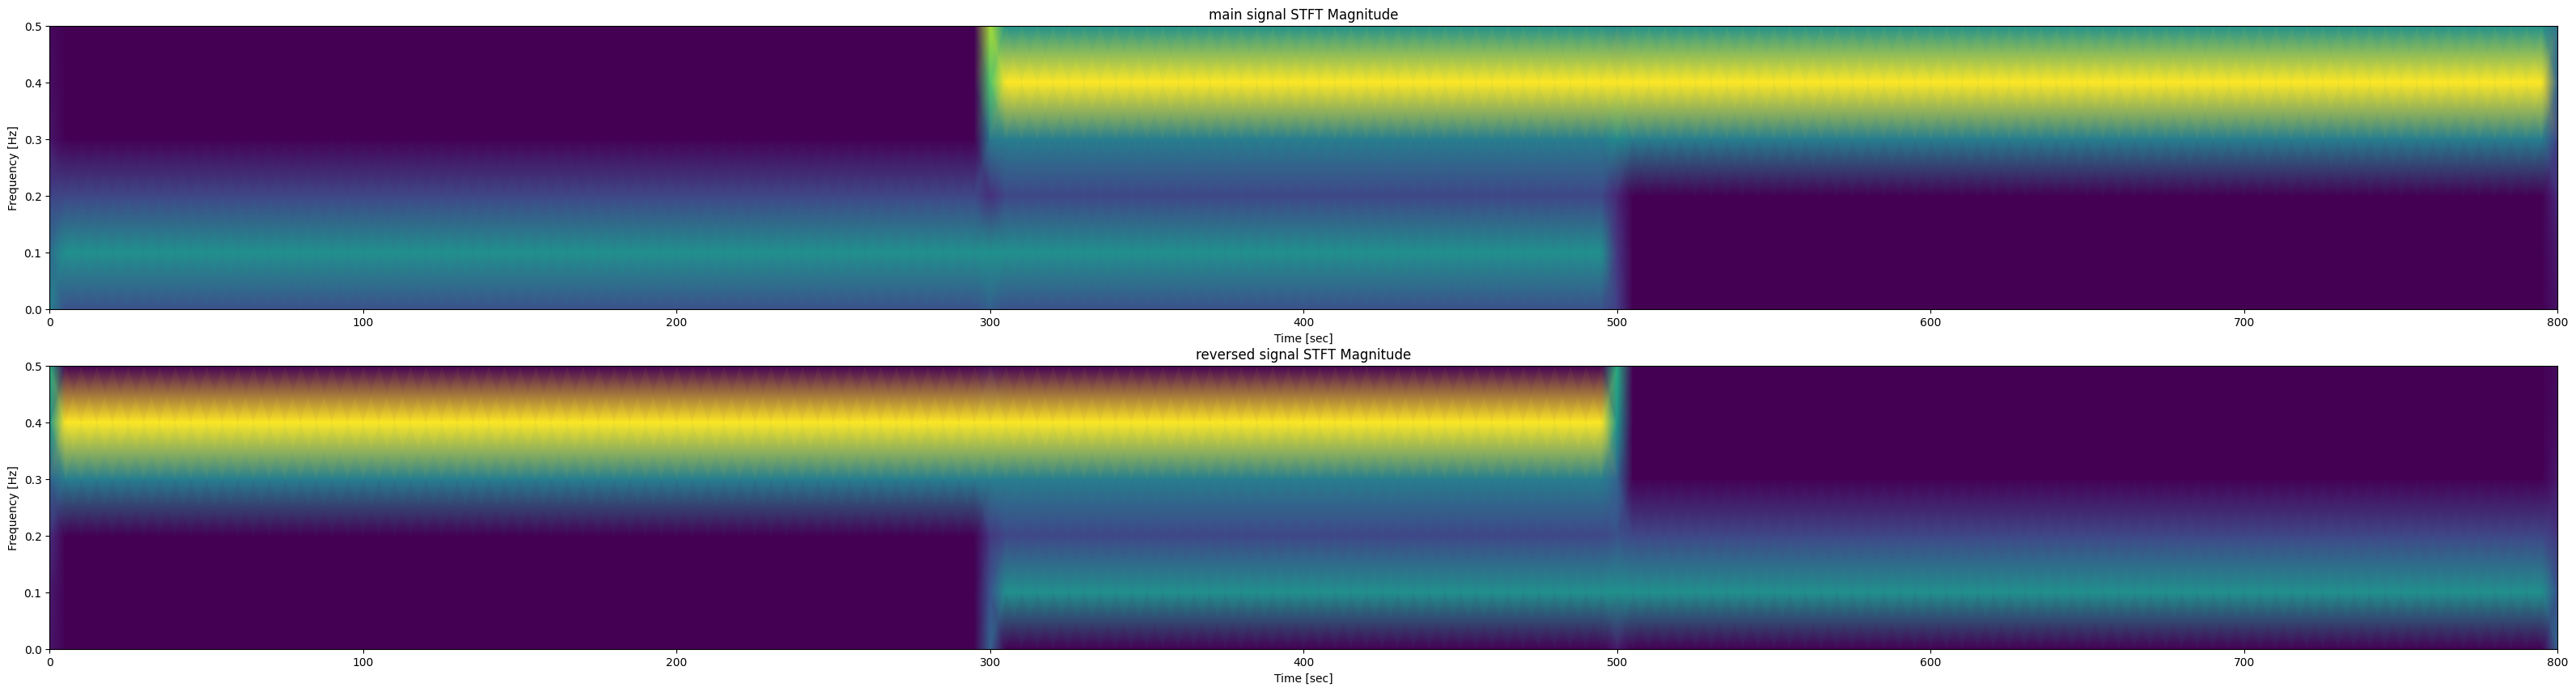

In [46]:
from scipy import signal

# '5. Use stft to compute the WFT for common windows sizes of f and fr.'
ws = 10
f, t, Zxx = signal.stft(data, window='hamming', nperseg=ws)
f, t, Zxx_fr = signal.stft(fr, window='hamming', nperseg=ws)

plt.figure(figsize=(40, 10))
plt.subplot(211)
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title('main signal STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.subplot(212)
plt.pcolormesh(t, f, np.abs(Zxx_fr), shading='gouraud')
plt.title('reversed signal STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

we can see the the signal is has two main frequencies. one is around 0.1 and the other is around 0.4.

to propose a definition for the signal we can say:
$$
\begin{align*}
f_1(t) &= \sin(2\pi \cdot 0.1 \cdot t) \\
f_2(t) &= \sin(2\pi \cdot 0.4 \cdot t) \\
f(t) &= \begin{cases}
f_1(t) & 0 \leq t \lt 300 \\
f_2(t) + f_1(t) & 300 \leq t \lt 500\\
f_2(t) & 500 \leq t \leq 800
\end{cases}
\end{align*}
$$

and finally to be sure about the result, lets find the distnat between the two signals:
$$
dist = \sqrt{\sum_{i=1}^{800} (f(t) - f_1(t))^2} = 0
$$

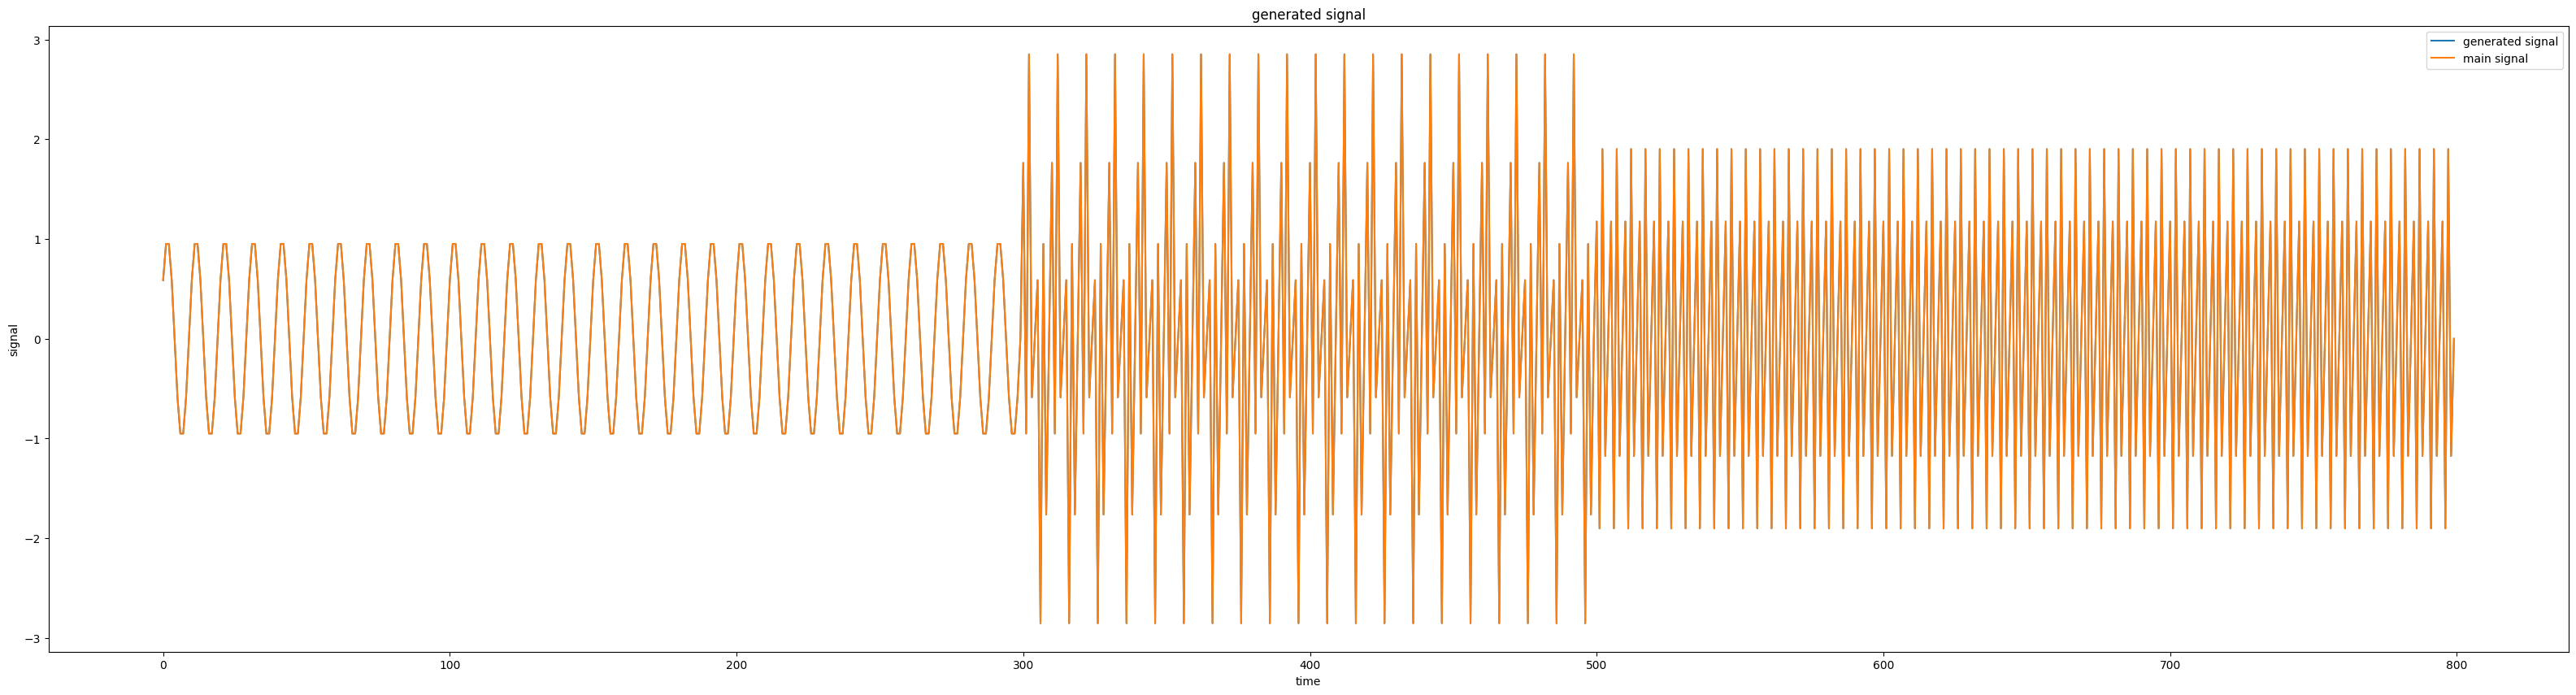

9.447827031552811e-07

In [94]:
from cProfile import label

t =  np.arange(500) + 1
generated_f = np.sin(0.1*2* np.pi *t)
generated_f = np.pad(generated_f, (0, 800 - generated_f.shape[0]), mode='constant', constant_values=0)
tmp = np.sin(0.4 * 2*np.pi * t)
tmp = np.pad(tmp, (800 - tmp.shape[0], 0), mode='constant', constant_values=0) * 2
generated_f += tmp

plt.figure(figsize=(40, 10))
plt.plot(generated_f, label = "generated signal")
plt.plot(data, label = "main signal")
plt.xlabel("time")
plt.ylabel("signal")
plt.title("generated signal")
# plt.xlim(500, 800)
plt.legend()
plt.show()
np.sum((generated_f - data)**2)**0.5
